In [29]:
#IMPORTING THE NECESSARY MODULES 
#e.g., numpy, pandas, matplotlib, yfinance

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf

In [31]:
#TAKING 10 YEARS OF DATA FOR OUR MODEL

start = '2012-01-01'
end = '2022-12-21'
stock ='GOOG'

data = yf.download(stock, start, end)

[*********************100%%**********************]  1 of 1 completed


In [32]:
data #PRINT THE DATA


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-01-03,16.262545,16.641375,16.248346,16.573130,16.573130,147611217
2012-01-04,16.563665,16.693678,16.453827,16.644611,16.644611,114989399
2012-01-05,16.491436,16.537264,16.344486,16.413727,16.413727,131808205
2012-01-06,16.417213,16.438385,16.184088,16.189817,16.189817,108119746
2012-01-09,16.102144,16.114599,15.472754,15.503389,15.503389,233776981
...,...,...,...,...,...,...
2022-12-14,95.540001,97.220001,93.940002,95.309998,95.309998,26452900
2022-12-15,93.540001,94.029999,90.430000,91.199997,91.199997,28298800
2022-12-16,91.199997,91.750000,90.010002,90.860001,90.860001,48485500


In [33]:
data.reset_index(inplace=True)

In [34]:
data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2012-01-03,16.262545,16.641375,16.248346,16.573130,16.573130,147611217
1,2012-01-04,16.563665,16.693678,16.453827,16.644611,16.644611,114989399
2,2012-01-05,16.491436,16.537264,16.344486,16.413727,16.413727,131808205
3,2012-01-06,16.417213,16.438385,16.184088,16.189817,16.189817,108119746
4,2012-01-09,16.102144,16.114599,15.472754,15.503389,15.503389,233776981
...,...,...,...,...,...,...,...
2756,2022-12-14,95.540001,97.220001,93.940002,95.309998,95.309998,26452900
2757,2022-12-15,93.540001,94.029999,90.430000,91.199997,91.199997,28298800
2758,2022-12-16,91.199997,91.750000,90.010002,90.860001,90.860001,48485500
2759,2022-12-19,90.879997,91.199997,88.925003,89.150002,89.150002,23020500


In [35]:
ma_100_days = data.Close.rolling(100).mean()   #Here ma means moving average.

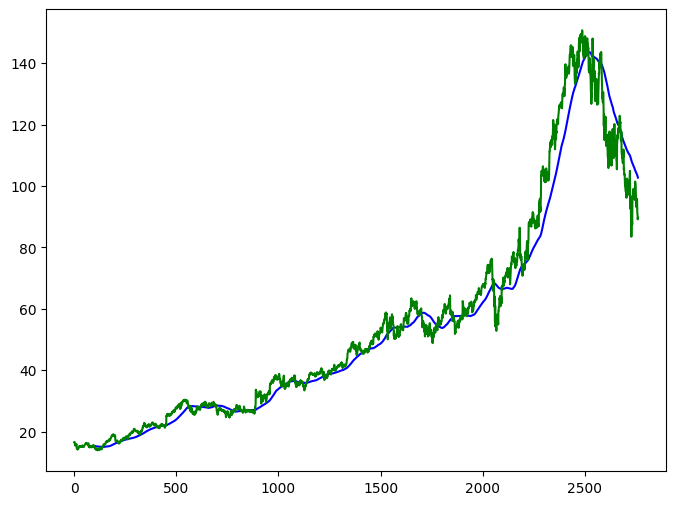

In [38]:
#PLOT DATA
plt.figure(figsize = (8,6))
plt.plot(ma_100_days, 'b')
plt.plot(data.Close, 'g')
plt.show()

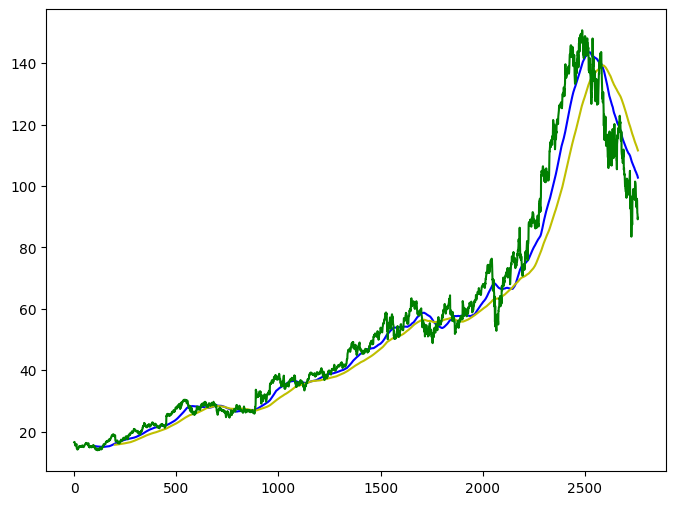

In [39]:
ma_200_days = data.Close.rolling(200).mean()
plt.figure(figsize=(8,6))
plt.plot(ma_100_days,'b')
plt.plot(ma_200_days, 'y')
plt.plot(data.Close, 'g')
plt.show()

In [40]:
data.dropna(inplace=True)

In [41]:
data_train = pd. DataFrame(data.Close[0: int(len(data)*0.80)])
data_test = pd.DataFrame(data.Close[int(len(data)*0.80): len(data)])

In [42]:
data_train.shape[0] #TRAINING DATASET

2208

In [43]:
data_test.shape[0] #TEST DATASET

553

In [44]:
#FIT STOCK PRICE

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
data_train_scale = scaler.fit_transform(data_train)

In [45]:
#10,11,12,15,16,17,18,19,20,17,18,19

In [46]:
x = []
y=  []
for i in range(100, data_train_scale.shape[0]):
    x.append(data_train_scale[i-100:i])
    y.append(data_train_scale[i,0])

In [47]:
x, y = np.array(x), np.array(y)

In [48]:
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential

In [49]:
# BUILD THE ARTIFICIAL NEURAL NETWORK MODEL

model = Sequential()
model.add(LSTM(units = 50, activation = 'relu', return_sequences = True,
               input_shape = ((x.shape[1],1))))
model.add(Dropout(0.2))

model.add(LSTM(units = 60, activation='relu', return_sequences = True))
model.add(Dropout(0.3))

model.add(LSTM(units = 80, activation = 'relu', return_sequences = True))
model.add(Dropout(0.4))

model.add(LSTM(units = 120, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(units =1))

In [50]:
#COMPILE OUR MODEL
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [51]:
#FIT OUR MODEL
model.fit(x,y, epochs = 50, batch_size = 32, verbose = 1)

Epoch 1/50

66/66 [==============================] - 12s 123ms/step - loss: 0.0373
Epoch 2/50
66/66 [==============================] - 8s 117ms/step - loss: 0.0080
Epoch 3/50
66/66 [==============================] - 8s 119ms/step - loss: 0.0069
Epoch 4/50
66/66 [==============================] - 8s 117ms/step - loss: 0.0062
Epoch 5/50
66/66 [==============================] - 8s 118ms/step - loss: 0.0060
Epoch 6/50
66/66 [==============================] - 8s 118ms/step - loss: 0.0047
Epoch 7/50
66/66 [==============================] - 8s 117ms/step - loss: 0.0055
Epoch 8/50
66/66 [==============================] - 8s 122ms/step - loss: 0.0045
Epoch 9/50
66/66 [==============================] - 9s 129ms/step - loss: 0.0047
Epoch 10/50
66/66 [==============================] - 9s 143ms/step - loss: 0.0040
Epoch 11/50
66/66 [==============================] - 8s 127ms/step - loss: 0.0044
Epoch 12/50
66/66 [==============================] - 8s 126ms/step - loss: 0.0038
Epoch 13/50
66/66 [====

In [52]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 dropout (Dropout)           (None, 100, 50)           0         
                                                                 
 lstm_1 (LSTM)               (None, 100, 60)           26640     
                                                                 
 dropout_1 (Dropout)         (None, 100, 60)           0         
                                                                 
 lstm_2 (LSTM)               (None, 100, 80)           45120     
                                                                 
 dropout_2 (Dropout)         (None, 100, 80)           0         
                                                                 
 lstm_3 (LSTM)               (None, 120)               9

In [53]:
pas_100_days = data_train.tail(100)
data_test = pd.concat([pas_100_days, data_test], ignore_index = True)

In [54]:
data_test

,Close
0,70.335999
1,70.139999
2,70.521004
3,70.850998
4,70.891998
...,...
648,95.309998
649,91.199997
650,90.860001
651,89.150002


In [55]:
data_test_scale = scaler.fit_transform(data_test)

In [56]:
x = []
y=  []
for i in range(100, data_test_scale.shape[0]):
    x.append(data_test_scale[i-100:i])
    y.append(data_test_scale[i,0])
x, y = np.array(x), np.array(y)

In [57]:
y_predict = model.predict(x)

18/18 [==============================] - 1s 42ms/step


In [58]:
y_predict

array([[0.11677569],
       [0.11559153],
       [0.11492455],
       [0.11481662],
       [0.11527155],
       [0.11627734],
       [0.11774795],
       [0.11959347],
       [0.12177274],
       [0.12427473],
       [0.1270871 ],
       [0.13020517],
       [0.13359632],
       [0.137118  ],
       [0.14062975],
       [0.14407766],
       [0.14746027],
       [0.1508194 ],
       [0.15430076],
       [0.15807375],
       [0.16227113],
       [0.1669771 ],
       [0.17218895],
       [0.17785354],
       [0.18386936],
       [0.19016074],
       [0.1966352 ],
       [0.20320415],
       [0.20971051],
       [0.21600595],
       [0.22191441],
       [0.22725923],
       [0.23196192],
       [0.23601574],
       [0.23950486],
       [0.24248283],
       [0.24506709],
       [0.24745505],
       [0.24984553],
       [0.2523951 ],
       [0.25516298],
       [0.25813556],
       [0.26122782],
       [0.26433325],
       [0.26734656],
       [0.27008316],
       [0.27234486],
       [0.273

In [59]:
scaler.scale_

array([0.01208985])

In [60]:
scale = 1/scaler.scale_

In [61]:
y_predict = y_predict*scale

In [62]:
y = y*scale

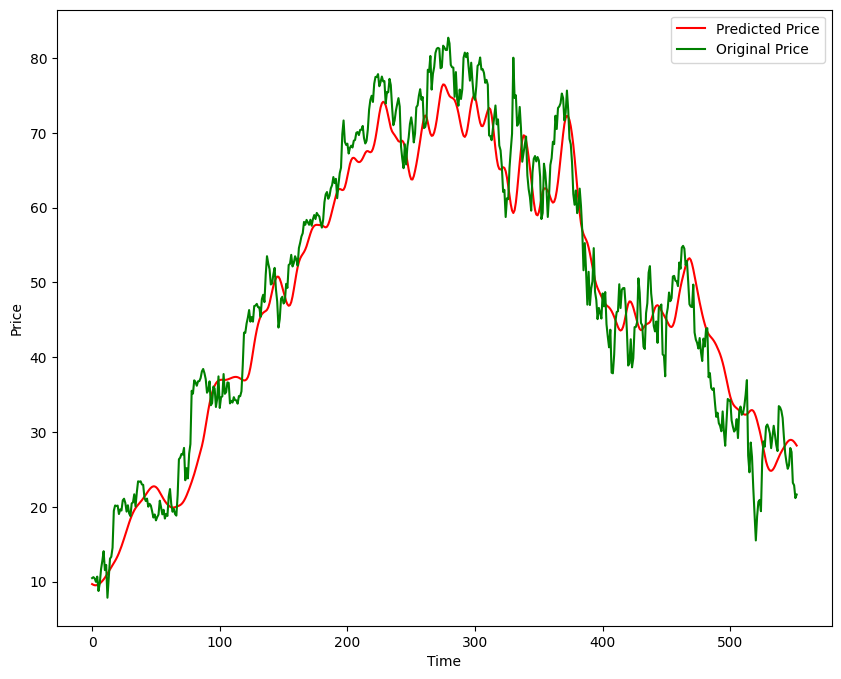

In [63]:
plt.figure(figsize = (10, 8))
plt.plot(y_predict, 'r' , label = 'Predicted Price')
plt.plot(y, 'g', label = 'Original Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

In [64]:
model.save('Stock__Price_Prediction.keras')